In [1]:
from qiskit import QuantumCircuit, QiskitError
#from qiskit import execute, BasicAer
import qiskit.ignis.verification.randomized_benchmarking as rb
#import qiskit.test.benchmarks.randomized_benchmarking as br
import pyzx
from pyzx.circuit.qasmparser import QASMParser

In [74]:
#qc = rb.randomized_benchmarking_seq()
qc = rb.randomized_benchmarking_seq(nseeds=1, length_vector=None,
                                rb_pattern=[[0,1]],
                                length_multiplier=1, seed_offset=0,
                                align_cliffs=False,
                                interleaved_gates=None,
                                is_purity=False)
qc = qc[0][0][0]
type(qc)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [75]:
# setting up the backend
# print(BasicAer.backends())

# running the job
# job_sim = execute(qc, BasicAer.get_backend('qasm_simulator'))
# sim_result = job_sim.result()

In [76]:
# print("\nPrint all gates:")
# [print(dat) for dat in qc.data]

In [77]:
qasm = qc.qasm()
print("\nPrint QASM:")
print(qasm)


Print QASM:
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
h qr[0];
sdg qr[0];
h qr[0];
sdg qr[1];
h qr[1];
cx qr[0],qr[1];
cx qr[1],qr[0];
sdg qr[0];
h qr[0];
h qr[1];
s qr[1];
z qr[0];
barrier qr[0],qr[1];
z qr[0];
sdg qr[1];
h qr[1];
h qr[0];
s qr[0];
cx qr[1],qr[0];
cx qr[0],qr[1];
h qr[1];
s qr[1];
h qr[0];
s qr[0];
h qr[0];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [78]:
# Draw the circuit
print(qc)

          ┌───┐ ┌─────┐┌───┐     ┌───┐┌─────┐┌───┐┌───┐ ░  ┌───┐ ┌───┐┌───┐»
qr_0: |0>─┤ H ├─┤ Sdg ├┤ H ├──■──┤ X ├┤ Sdg ├┤ H ├┤ Z ├─░──┤ Z ├─┤ H ├┤ S ├»
         ┌┴───┴┐└┬───┬┘└───┘┌─┴─┐└─┬─┘└┬───┬┘├───┤└───┘ ░ ┌┴───┴┐├───┤└───┘»
qr_1: |0>┤ Sdg ├─┤ H ├──────┤ X ├──■───┤ H ├─┤ S ├──────░─┤ Sdg ├┤ H ├─────»
         └─────┘ └───┘      └───┘      └───┘ └───┘      ░ └─────┘└───┘     »
 cr_0: 0 ══════════════════════════════════════════════════════════════════»
                                                                           »
 cr_1: 0 ══════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌───┐     ┌───┐┌───┐┌───┐┌─┐
«qr_0: ┤ X ├──■──┤ H ├┤ S ├┤ H ├┤M├
«      └─┬─┘┌─┴─┐├───┤├───┤└┬─┬┘└╥┘
«qr_1: ──■──┤ X ├┤ H ├┤ S ├─┤M├──╫─
«           └───┘└───┘└───┘ └╥┘  ║ 
«cr_0: ══════════════════════╬═══╩═
«                            ║     
«cr_1: ══════════════════════╩═════
«                  

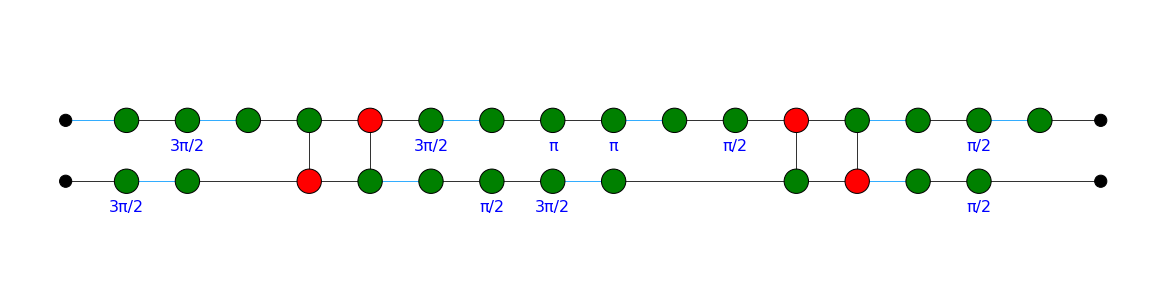

In [84]:
p = QASMParser()
c = p.parse(qasm)
c.name = "pyzx_" + qc.name
#pyzx.draw(c)
pyzx.draw(c.to_graph(), layout=None, labels=False, figsize=(16,4), h_edge_draw='blue', rows=None)

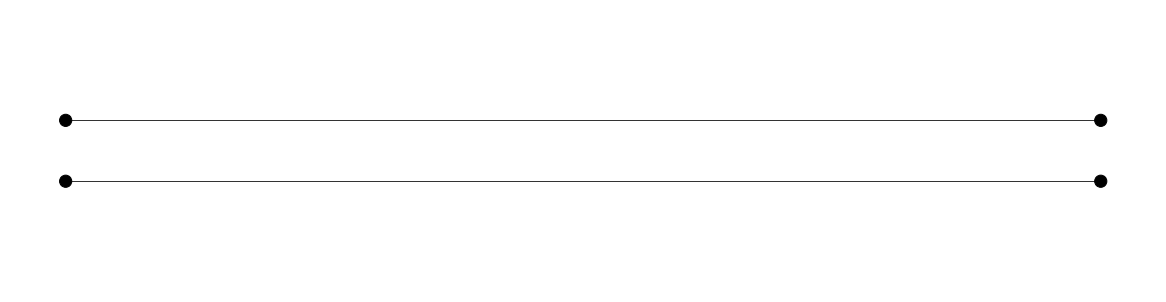

In [85]:
g = c.to_graph()
pyzx.full_reduce(g)
#g.normalise()
pyzx.draw(g, layout=None, labels=False, figsize=(16,4), h_edge_draw='blue', rows=None)

In [81]:
#new_c = pyzx.extract.streaming_extract(g)
new_c = c.from_graph(g)
pyzx_qasm = new_c.to_basic_gates().to_qasm()
print(pyzx_qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];



In [82]:
pqsl = [line + "\n" for line in pyzx_qasm.splitlines()]
qsl = [line + "\n" for line in qasm.splitlines()]
# print(pqsl)
# print(qsl)
new_qasm = ''.join(qsl[0:4]) + ''.join(pqsl[3:]) + ''.join(qsl[-2:])
new_qasm = new_qasm.replace('q[', 'qr[')
print(new_qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [83]:
new_qc = qc.from_qasm_str(new_qasm)
print(new_qc)

         ┌─┐   
qr_0: |0>┤M├───
         └╥┘┌─┐
qr_1: |0>─╫─┤M├
          ║ └╥┘
 cr_0: 0 ═╩══╬═
             ║ 
 cr_1: 0 ════╩═
               
